<a href="https://colab.research.google.com/github/Arjx01/ML_LAB/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9755 - loss: 0.0795 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 7.6306e-04
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 4.8442e-04
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 2.0955e-04
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 7.5949e-04 - val_accuracy: 1.0000 - val_loss: 1.9633e-04


In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8871e-04
Test Accuracy: 99.95%


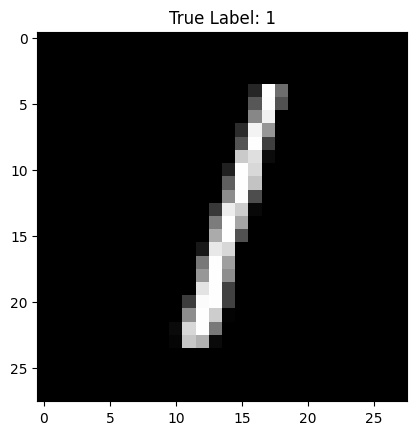

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted probability of 1: 0.99991685
Predicted label: 1


In [11]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Label: {y_test[0]}")
plt.show()

pred = model.predict(np.expand_dims(x_test[0], axis=0))
print("Predicted probability of 1:", pred[0][0])
print("Predicted label:", int(pred[0][0] > 0.5))